
###### Un árbol de decisión es un algoritmo de aprendizaje supervisado no paramétrico que aprende de forma iterativa y se utiliza tanto para tareas de clasificación como de regresión. En cuanto a su estructura, es jerárquico y consta de un nodo raíz, ramas, nodos internos y nodos hoja. El proceso comienza en el nodo raíz, y las ramas salientes del mismo alimentan los nodos internos. Estos nodos realizan evaluaciones para formar subconjuntos homogéneos, que se indican mediante nodos hoja o terminales que representan todos los posibles resultados dentro del conjunto de datos. IBM. "What is a Decision Tree?" IBM. https://www.ibm.com/topics/decision-trees (accedido el 1 de marzo de 2023).
###### Entre las muchas ventajas de ejecutar un árbol de decisión, es importante destacar que esta estructura es integral, ya que evalúa todos los posibles resultados de una elección, permitiendo una comprensión rápida de los riesgos y las consecuencias de las decisiones, a la vez que reduce el sesgo. Además, son fáciles de entender.
######En cuanto al problema a resolver, se encontró interés en la toma de decisión de hacer o no algo según el pronóstico climático considerando que el territorio colombiano presenta un clima tropical, que se caracteriza por ser poco estable en gran parte del año. En este sentido, se decidió analizar un código que implementa arboles de decisión para saber si es viable jugar tennis según aspectos climáticos: Outlook, Temprature, Humidity, Wind. 
######Fuente: https://github.com/luelhagos/Play-Tennis-Implementation-Using-Sklearn-Decision-Tree-Algorithm/blob/master/Play%20Tennis%20%20Implementation%20Using%20Sklearn%20Decision%20Tree%20Algorithm.ipynb


#  Load libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [2]:
df=pd.read_csv("Play Tennis.csv")# Cargar los datos
value=['Outlook','Temprature','Humidity','Wind']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Data Analysis

#### En este punto se hace un breve analisis descriptivo de los datos

In [4]:
len(df)           #Dataset Lenght

14

In [5]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 6)

In [6]:
df.head()         #To inspect the first five records of the dataset:

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
df.tail()         #To inspect the last five records of the dataset:

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [7]:
df.describe()     #To see statistical details of the dataset:

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


# Preparing the Data (Data Slicing)

### Con la clase .LabelEnconder las variables categóricas del DataFrame se habrán sustituido por etiquetas numéricas enteras . el fit_transfomr la implementan para que podamos escalar los datos de entrenamiento y también aprender los parámetros de escalado de estos. 

In [8]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


###### En X guardará un nuevo df con la variable explicativa
###### En Y guardará un nuevo df con la variable respuesta 
###### Se utilizará para entrenar un modelo de aprendizaje automático.

In [13]:
#To divide our data into attribute set and Label:
feature_cols = ['Outlook','Temprature','Humidity','Wind']
X = df[feature_cols ]                               #contains the attribute 
y = df.Play_Tennis                                  #contains the label

#####train_test_split dividira los datos en subconjuntos de entrenamiento y de prueba de forma aleatoria, el test_size=0.30 ndicaría que el 30% de los datos deberían utilizarse para las pruebas.

#####*retornará los datos segun el entrenamineto y los de prueba 

In [14]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

# Training and Making Predictions

#### crea el clasificador (arbol de decisión) bajo el criterio de entropía, que mide el grado de impureza o aleatoriedad de los datos, con random_state se establece la semilla para el generador de números aleatorios, con .fit entrenara al clasificador segun los X y Y

In [15]:
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or 

DecisionTreeClassifier(criterion='entropy', random_state=100)


classifier.predict(X_test) toma el  conjunto de datos de prueba y utiliza un modelo de clasificación para predecir las etiquetas de clase correspondientes

In [16]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)  

##### como se comenta, con el metodod metrics.acurracy, calculará la presición de los datos de prueba con los que se obtuvieron de la prediccion. Note que la precisión no es necesariamente alta

In [17]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

##### visualiza el resultado

In [18]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
11,1,0
12,1,1
4,1,1
5,0,1
2,1,1


# Evaluating the Algorithm

### Se genera una matriz de confusión y un informe de clasificación para evaluar el rendimiento de un modelo de clasificación en un conjunto de datos de prueba.

##### En particual, el metodo confusion_matrix toma dos argumentos: y_test y y_pred para resumir  el rendimiento del modelo de clasificación en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

##### Por otro lado, classification_report genera un informe de clasificación que incluye varias métricas como precisión, recuperación, puntuación F1 teniendo en cuenta los mismos argumentos 

In [19]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[0 1]
 [1 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



# Visualizing Decision Trees

#### Con la función export_graphviz se representará graficamenete el arbol, por eso recibe como parametros, el arbol "classifier", dot_data que es el archivo de salida que lo lee como un buffer de cadena dado "StringIO()" y los demas parametros son para las caracteristicas graficas del arbol.

#### Con pydotplus.graph_from_dot_data(dot_data.getvalue() se creará el objeto grafico de tipo graphviz.

#### Por ultimo, despliega la imagen de grafico del arbol, que mostrará los resultados de decision segun el modelo

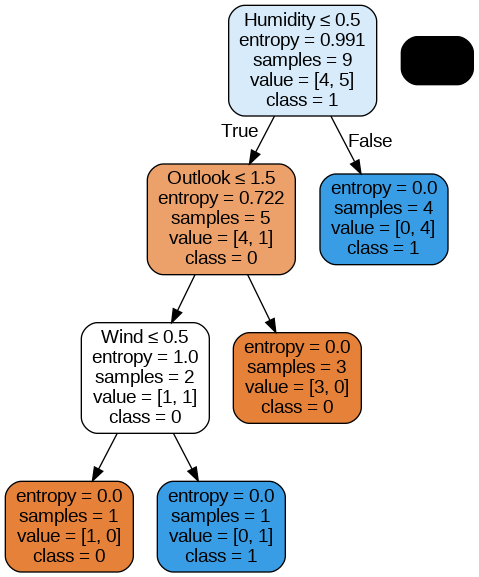

In [21]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())